# 0. For the selected data set, train at least one tree-based ensemble model, e.g. random forest, gbdt, xgboost.

I'm going to use XGBoost classifier from my previous homeworks

In [41]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
XGBClassifier,0.218579,0.869565,0.349345,0.969579,0.938214


# 1. Calculate Permutation-based Variable Importance for the selected model.

(in case figures didn't render correctly, I attach png files)

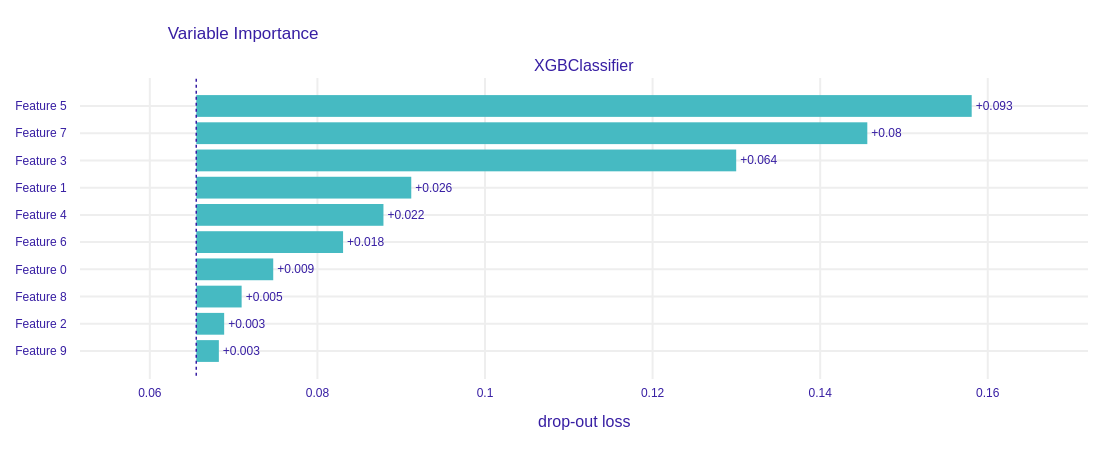

In [42]:
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

We can distinguish three features of the highest importance (5. 7. and 3.). The rest plays less significant role.

# 2. Train three more candidate models (different variable transformations, different model architectures, hyperparameters) and compare their rankings of important features using PVI. What are the differences? Why?

Below, I prepared Random Forest, Logical Regression and ordinary neural network:

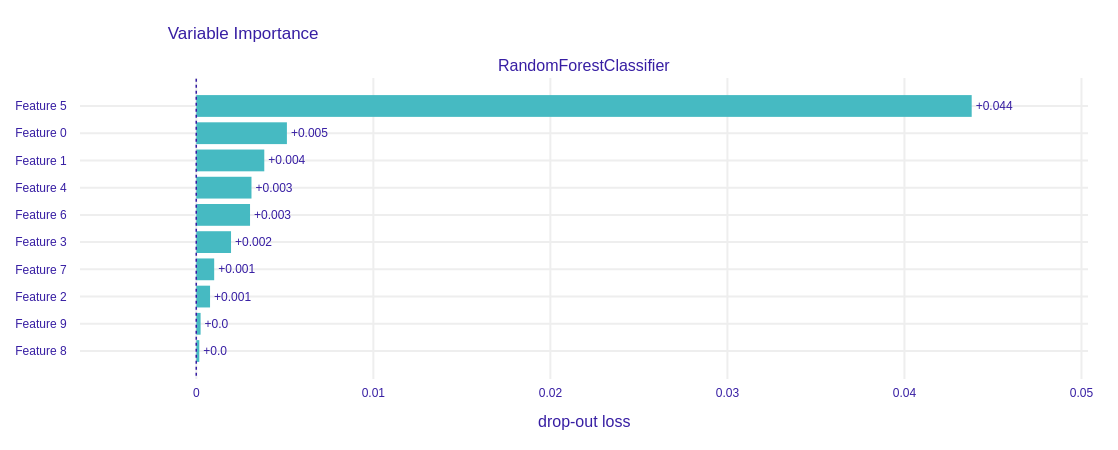

In [51]:
pvi2.plot(show=False).update_layout(autosize=False, width=600, height=450)

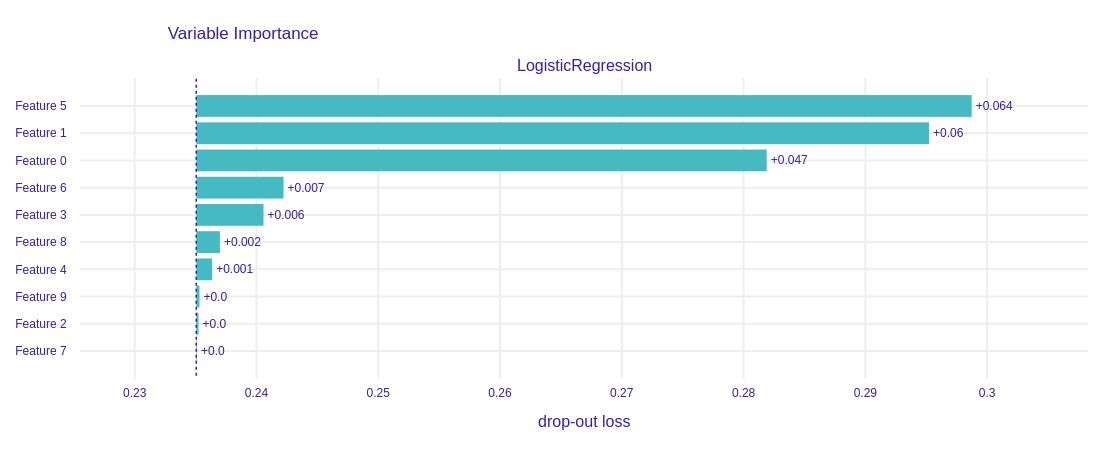

In [50]:
pvi3.plot(show=False).update_layout(autosize=False, width=600, height=450)

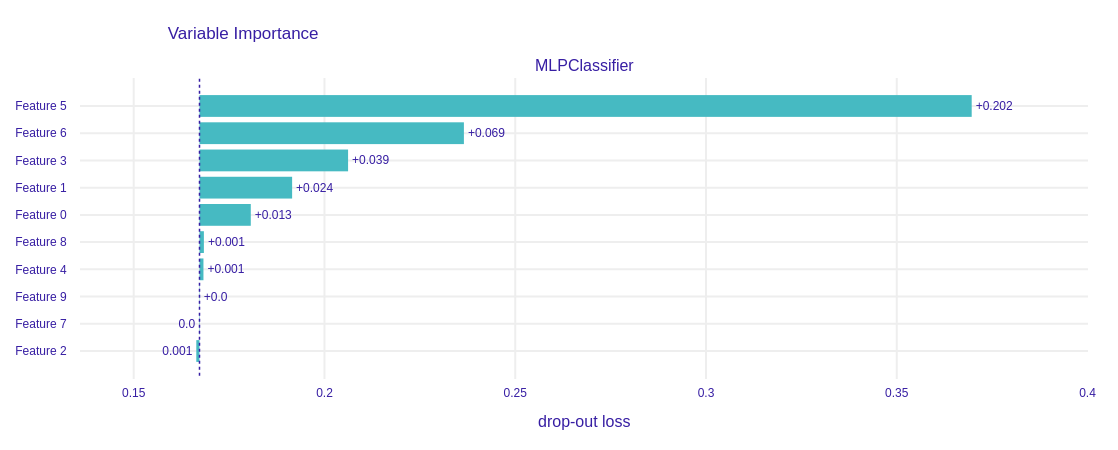

In [45]:
pvi4.plot(show=False).update_layout(autosize=False, width=600, height=450)

Although all models pay the greatest attention to the feature 5, the resto of features are treated completely different. Those various behaviours are presumably caused by the fact, that each model represent unique approach to comprehend the data. Dissimilar approaches to creation of the models and data analysis, result in different interactions discovered and learned by those models.

# 3. For the tree-based model from (1), compare PVI with:

Here again PVI for comparison:

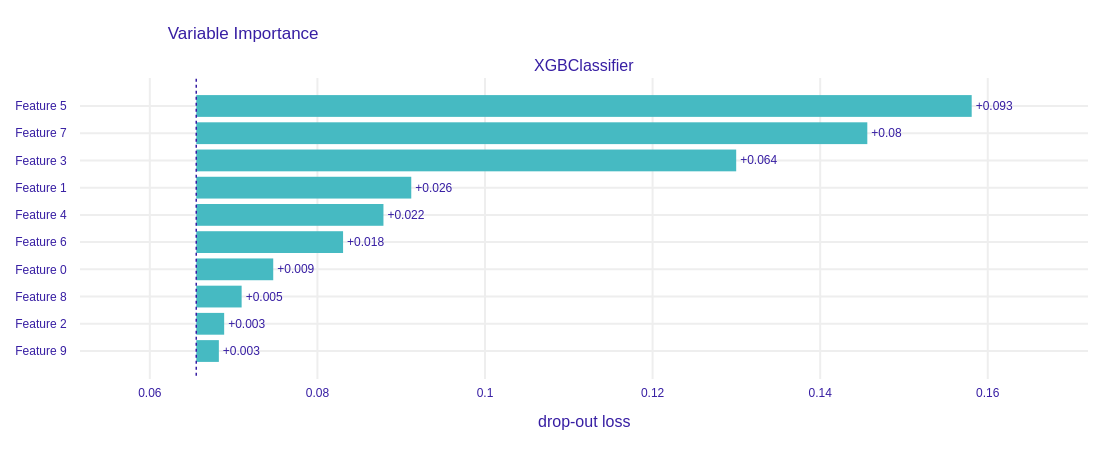

In [46]:
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

### A) the traditional feature importance measures for trees: Gini impurity

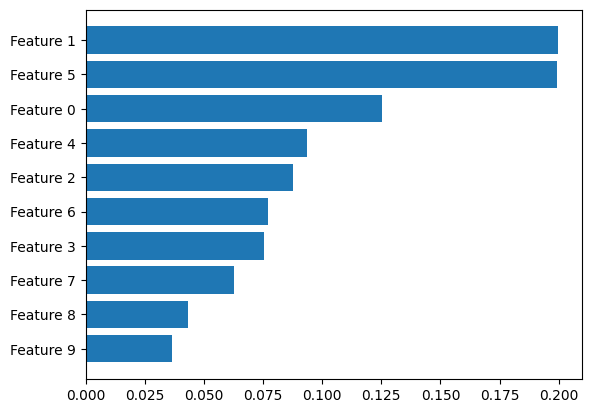

In [47]:
show_traditional_importance()

The results are very different - the only similarity is importance of feature 5.

### B) SHAP variable importance based on the TreeSHAP algorithm

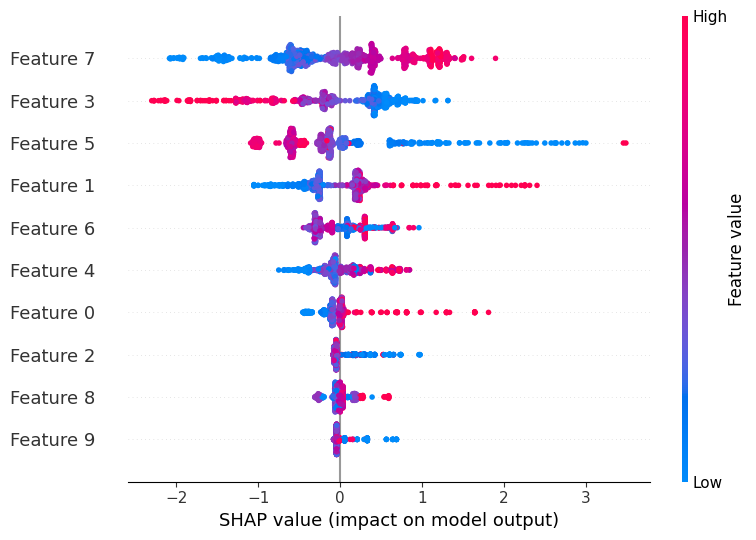

In [48]:
shap_vi.plot()

Here, the results nicely corresponds to PVI. The first four most important features are the same, differences appear when we delve into less significant features. Hence, it may be tempting to conclude that shapley values and PMI are better measures, because they correlate. However, it's impossible to claim that with certainty, because again - the measuring tools approach their subjects with different methodology and may have discovered distinct part of the true picture.

# Appendix

In [49]:
import dalex as dx
import matplotlib
import platform
import xgboost
import sklearn
from copy import deepcopy
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# https://github.com/adrianstando/imbalanced-benchmarking-set/blob/main/datasets/wine_quality.csv
dataset = pd.read_csv('wine_quality.csv')
y = dataset["TARGET"].apply(lambda x: 1 if x == 1 else 0)
X_tmp = dataset.drop(axis=1, columns=["TARGET", "Unnamed: 0"])

# rename columns 
X = pd.DataFrame()
X_tmp.head()
for i in range(0,10):
    X[f"Feature {i}"] = X_tmp[str(i)]
X.info()

model = xgboost.XGBClassifier(
    n_estimators=50, 
    max_depth=2, 
    use_label_encoder=False, 
    eval_metric="logloss",
    enable_categorical=True,
    tree_method="hist"
)
model2 = RandomForestClassifier(random_state=22)
model3 = LogisticRegression(random_state=22, max_iter=1000)
model4 = MLPClassifier(random_state=22)

model.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
model4.fit(X, y)

explainer = dx.Explainer(model, X, y, predict_function=lambda model_, df_: model_.predict_proba(df_)[:, 1])
explainer2 = dx.Explainer(model2, X, y, predict_function=lambda model_, df_: model_.predict_proba(df_)[:, 1])
explainer3 = dx.Explainer(model3, X, y, predict_function=lambda model_, df_: model_.predict_proba(df_)[:, 1])
explainer4 = dx.Explainer(model4, X, y, predict_function=lambda model_, df_: model_.predict_proba(df_)[:, 1])

pvi = explainer.model_parts(random_state=22)
shap_vi = explainer.model_parts(type="shap_wrapper", shap_explainer_type="TreeExplainer", random_state=22)
pvi2 = explainer2.model_parts(random_state=22)
pvi3 = explainer3.model_parts(random_state=22)
pvi4 = explainer4.model_parts(random_state=22)

def show_traditional_importance():
    labels = X.columns
    values = model.feature_importances_
    values, labels = zip(*sorted(zip(values, labels)))
    plt.barh(labels, values)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 0  4898 non-null   float64
 1   Feature 1  4898 non-null   float64
 2   Feature 2  4898 non-null   float64
 3   Feature 3  4898 non-null   float64
 4   Feature 4  4898 non-null   float64
 5   Feature 5  4898 non-null   float64
 6   Feature 6  4898 non-null   float64
 7   Feature 7  4898 non-null   float64
 8   Feature 8  4898 non-null   float64
 9   Feature 9  4898 non-null   float64
dtypes: float64(10)
memory usage: 382.8 KB
Preparation of a new explainer is initiated

  -> data              : 4898 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4898 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
 